# GRIP :The Spark Foundation 



# Data Science and Business Analytics Internship

# Author : Rutuja Matre

# Task1 : Prediction Using Supervised Machine Learning

In this regression task, we will predict the percentage of marks that a student is expected to score based upon the number of hour they studied . 

# Importing Modules:

In [52]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


In [53]:
df = pd.read_csv("student_scores - student_scores.csv")
print("Shape of dataset is :" , df.shape)
df.head()

Shape of dataset is : (25, 2)


,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


In [54]:
#Checking for any missing value

df.isnull().sum()


Hours     0
Scores    0
dtype: int64

In [55]:
df.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


In [56]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Hours   25 non-null     float64
 1   Scores  25 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 528.0 bytes


# now we will plot our data points and see if we can find any relationship between the data

by using plot() functipn of the pandas dataframe and we will pass it to the column names for x-coordinatei.e."Hours" and  y-coordinates i.e"Scores"

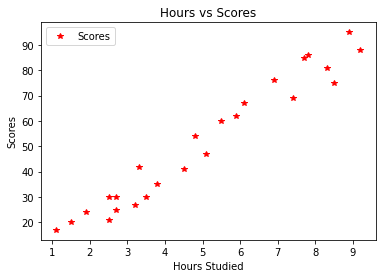

In [57]:
df.plot(x='Hours' , y = 'Scores' , style ='*' , color ='red')
plt.title('Hours vs Scores')
plt.xlabel('Hours Studied')
plt.ylabel('Scores')
plt.show()

so from the above graph we can conclude that their is linear relationship between hours and scores.

# Next is to divide the data into attributes and labels. Attributes are the independent variables and labels are dependent variable.
Dependent variables are those whose values are predict.In our dataset we want to to predict the score , so in our dataset attributes are 'Hours' and label will be 'Scores' column.

In [58]:
X= df.iloc[: , : -1].values
y= df.iloc[: , 1].values

In [59]:
X

array([[2.5],
       [5.1],
       [3.2],
       [8.5],
       [3.5],
       [1.5],
       [9.2],
       [5.5],
       [8.3],
       [2.7],
       [7.7],
       [5.9],
       [4.5],
       [3.3],
       [1.1],
       [8.9],
       [2.5],
       [1.9],
       [6.1],
       [7.4],
       [2.7],
       [4.8],
       [3.8],
       [6.9],
       [7.8]])

In [60]:
y

array([21, 47, 27, 75, 30, 20, 88, 60, 81, 25, 85, 62, 41, 42, 17, 95, 30,
       24, 67, 69, 30, 54, 35, 76, 86], dtype=int64)

# The next step is to split this data into training and test test.

We will do this by using Scikit-Learns build in train_test_split() method. The below code will split 80% of the data to training set and 20% of the data to the test set

In [61]:
from sklearn.model_selection import train_test_split
X_train , X_test , y_train , y_test = train_test_split(X , y ,test_size = 0.2 , random_state =0)

In [62]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train , y_train)
print("Training complete")

Training complete


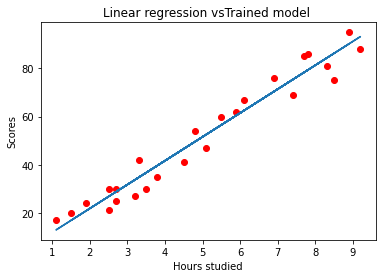

In [22]:
line=regressor.coef_*X+regressor.intercept_
plt.title('Linear regression vsTrained model ')
plt.scatter(X ,y , color='red')
plt.xlabel('Hours studied')
plt.ylabel('Scores')
plt.plot(X ,line)
plt.show()

# Prediction

we have trained our model. now we will make the prediction.Then y_pred is a numpy array that contains all the predicted values for the input values in the X_test series

In [24]:
print(X_test)
y_pred = regressor.predict(X_test)

[[1.5]
 [3.2]
 [7.4]
 [2.5]
 [5.9]]


In [25]:
y_pred


array([16.88414476, 33.73226078, 75.357018  , 26.79480124, 60.49103328])

In [31]:
df = pd.DataFrame({'Actual': y_test , 'predicted': y_pred})
df

,Actual,predicted
0,20,16.884145
1,27,33.732261
2,69,75.357018
3,30,26.794801
4,62,60.491033


<AxesSubplot:>

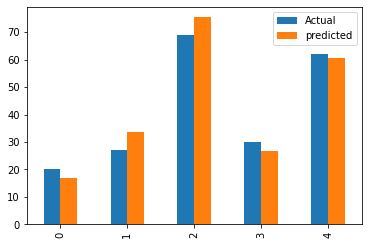

In [32]:
df.plot(kind='bar')

In [40]:
hours = 9.25
test = np.array([hours])
test = test.reshape(-1 ,1)
pred = regressor.predict([[9.25]])
print("No of Hours = {}".format(hours))
print("Predicted Scores ={}".format(pred[0]))

No of Hours = 9.25
Predicted Scores =93.69173248737535
